#Sprint 2 - IA/IOT


### Import de bibliotecas

#### Import de todas as bibliotecas:

In [ ]:
# Instalação de mais bibliotecas
!pip install kaggle
!pip install unidecode

In [ ]:
# Manipulação dos dados:
import pandas as pd
import numpy as np

#Graficos:
import seaborn as sns
import matplotlib.pyplot as plt
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# Machine Learning
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Flatten
from sklearn.model_selection import train_test_split

# PLN (Processamento de Linguagem Natural) e Pré-processamentos de dados:
import nltk
from nltk import tokenize
from numpy.lib.function_base import vectorize
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import unidecode
import nltk

#Etc:
import json
import random

#### Import das bibliotecas Dashboard

In [ ]:
# Instalação de mais bibliotecas
!pip install jupyter-dash

In [ ]:
# Para Dashboards:

# Manipulação dos dados:
import pandas as pd
import numpy as np
import seaborn as sns

# Graficos:
import matplotlib.pyplot as plt
from dash import dcc
import dash_html_components as html
import plotly.express as px

#### Import das bibliotecas IAs:

In [ ]:
# Instalação de mais bibliotecas
# Estão em ambas IAs:
!pip install kaggle
!pip install unidecode

In [ ]:
# Para Prototipo IA 1:

# Manipulação dos dados:
import pandas as pd
import numpy as np

# Machine Learning:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Flatten

# PLN (Processamento de Linguagem Natural) e Pré-Processamento de dados:
import nltk
from nltk import tokenize
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import unidecode

In [ ]:
# Para Prototipo IA 2:

# Etc:
import json
import random

# Manipulação dos dados:
import pandas as pd
import numpy as np

# Machine Learning:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# PLN (Processamento de Linguagem Natural) e Pré-Processamento de dados:
import unidecode
import nltk
from nltk import tokenize
from string import punctuation
from numpy.lib.function_base import vectorize
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d onlineretailshop/online-shop-customer-sales-data

100% 0.98M/0.98M [00:00<00:00, 1.13MB/s]
100% 0.98M/0.98M [00:00<00:00, 1.13MB/s]


In [ ]:
from zipfile import ZipFile
file_name = 'online-shop-customer-sales-data.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
df_dash = pd.read_csv("Online Shop Customer Sales Data.csv")

In [ ]:
df_dash.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [ ]:
df_dash.describe()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,27.732935,3.992477,15.968699,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,14.941878,2.004370,13.229295,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,0.500000,1.000000,0.005000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,15.300000,2.000000,4.819750,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,30.100000,4.000000,12.640000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,37.600000,6.000000,24.752000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,59.900000,7.000000,59.900000,3.000000,1080.000000,3.000000,1.000000,1.000000


In [ ]:
df_dash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [ ]:
df_dash.isnull().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [ ]:
df_dash.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [ ]:
df_dash['Time_Spent2'] = (df_dash['Time_Spent']/60).round(0)

In [ ]:
def mapear_idade(x):
    if x in range(0,19): return('Jovem')
    elif x in range(20,59): return('Adultos')
    else: return('Idosos')

In [ ]:
df_dash['Age_class'] = df_dash['Age'].apply(mapear_idade) 

In [ ]:
df_time = pd.DatetimeIndex(df_dash["Purchase_DATE"])

In [ ]:
df_dash["Month"] = df_time.month

In [ ]:
def mapear_genero(x):
    if x == 1: return('Female')
    else: return('Male')

In [ ]:
df_dash['Gender_string'] = df_dash['Gender'].apply(mapear_genero) 

<ipython-input-59-a53fc8d45888>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_dash.corr().round(2)


<Axes: >

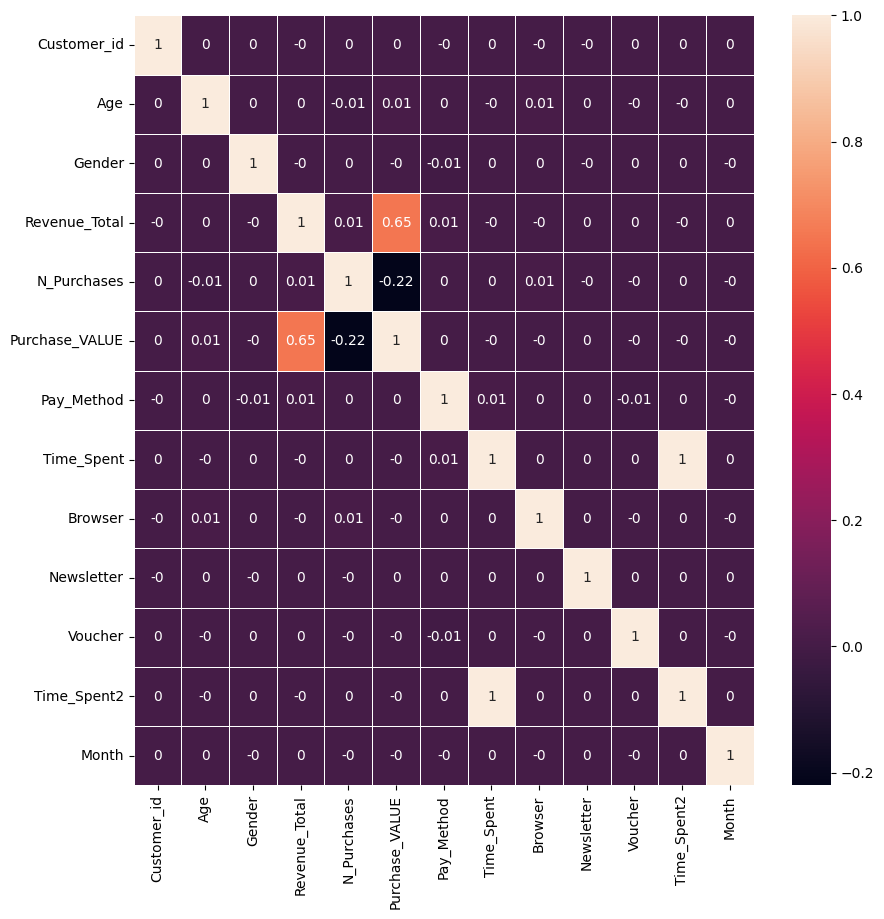

In [ ]:
correlation_matrix = df_dash.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [ ]:
#- Ver quais são os meses que mais vendem
#- Ver qual faixa etaria mais compra/ mais gasta dinheiro
#- Ver qual o browser mais usado 

In [ ]:
df_dash["Time_Spent2"].value_counts()

8.0     4218
16.0    4182
6.0     4172
5.0     4147
9.0     4142
14.0    4140
11.0    4115
4.0     4095
10.0    4087
3.0     4060
12.0    4060
17.0    4054
15.0    4026
7.0     3991
13.0    3985
2.0     2198
18.0    2124
Name: Time_Spent2, dtype: int64

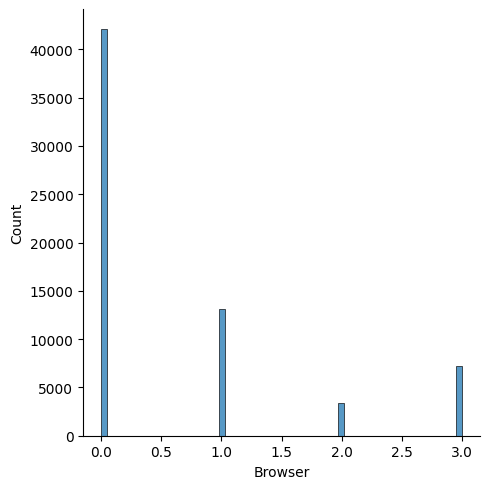

In [ ]:
grafico1 = sns.displot(data= df_dash, x="Browser")
#0 - Chrome, 1 - Safari, 2 - Edge, 3 - Outros

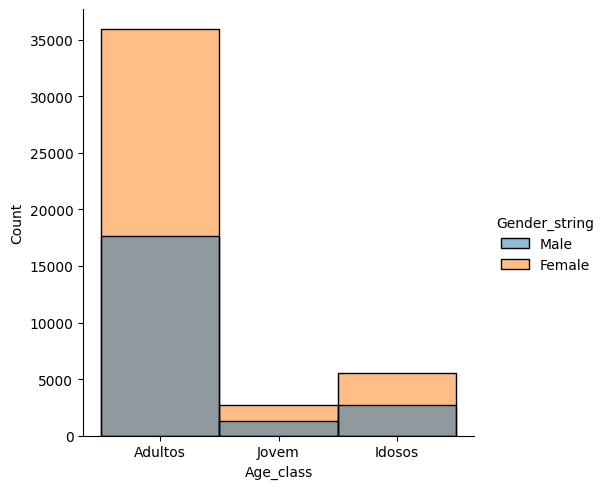

In [ ]:
grafico2 = sns.displot(data = df_dash, x="Age_class", hue="Gender_string")

In [ ]:
#teste = {"Female": df_dash.loc[df_dash['Gender'] == 1], "Male":df_dash.loc[df_dash['Gender'] == 0]}

In [ ]:
counts = df_dash.groupby(['Age_class', 'Gender_string']).size().unstack()

In [ ]:
counts

Gender_string,Female,Male
Age_class,,
Adultos,35927,17625
Idosos,5506,2698
Jovem,2739,1301


In [ ]:
df_dash

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Time_Spent2,Age_class,Month,Gender_string
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0,15.0,Adultos,6,Male
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1,11.0,Jovem,10,Female
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0,13.0,Adultos,3,Female
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0,15.0,Adultos,10,Male
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0,10.0,Adultos,9,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0,15.0,Adultos,2,Female
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0,12.0,Adultos,5,Male
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0,7.0,Adultos,10,Male
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0,12.0,Adultos,9,Male


In [ ]:
grafico2 = px.bar(x="Age_class", color="Gender_string", pattern_shape="Gender_string", pattern_shape_sequence=[".", "x", "+"])
grafico2.show()

ValueError: ignored

In [ ]:
df_dash["Gender_string"].value_counts()

Female    44172
Male      21624
Name: Gender_string, dtype: int64

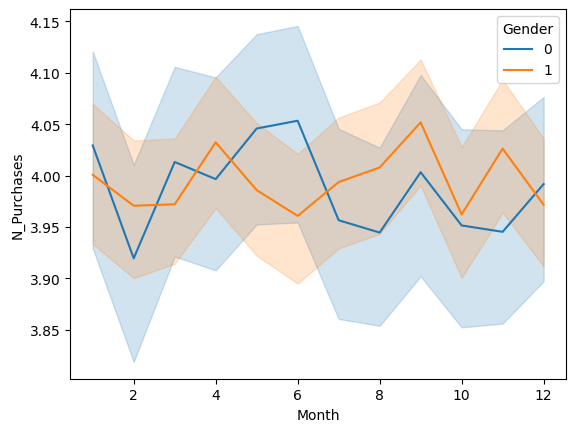

In [ ]:
grafico3 = sns.lineplot(data=df_dash, x="Month", y="N_Purchases",hue="Gender")

In [ ]:
grafico3 = px.line(df_dash, x="Month", y="N_Purchases")
grafico3.show()

In [ ]:
grafico4 = sns.relplot(data=df_dash, x="", y="")

In [ ]:
external_style="https://codepen.io/chriddyp/pen/bWLwgP.css"
app = JupyterDash(__name__, external_style)

In [ ]:
grafico1 = px.bar(df_dash, x="Age_class", y="N_Purchases")

In [ ]:
grafico2 = px.scatter(df_dash, x="Time_Spent", y="Age",color="Browser")

In [ ]:
app.layout = html.Div(children =[
    html.H1(children='Grafico 1 - TESTE'),

    html.Div(children='''
    Grafico teste para melhor entendimento da bibliteca
    '''),

    dcc.Graph(
        id='example-graph',
        figure=grafico1
    ),

    dcc.Graph(
        id='example-graph2',
        figure=grafico2
    )                                    
])

In [ ]:
app.run_server(mode='inline')

### IAs





#### Prototipo 1 - Analise de sentimentos com rede neural


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#De upload no kaggle.json antes de rodar esse codigo
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d luisfredgs/imdb-ptbr

imdb-ptbr.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'imdb-ptbr.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
df_imdb = pd.read_csv("imdb-reviews-pt-br.csv")

In [ ]:
df_imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
classificacao = df_imdb["sentiment"].replace(["neg", "pos"],[0, 1])
df_imdb["Classificacao"] = classificacao

In [ ]:
tokenizer = tokenize.WordPunctTokenizer()

In [ ]:
pontuacao = list()
for acento in punctuation:
    pontuacao.append(acento)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = nltk.corpus.stopwords.words("portuguese")
pontuacao_stopwords2 = pontuacao + stop_words
stopwords_sem_acento2 =  [unidecode.unidecode(texto) for texto in pontuacao_stopwords2]

In [ ]:
sem_acentos2 = [unidecode.unidecode(texto) for texto in df_imdb["text_pt"]]

In [ ]:
df_imdb["Processamento"] = sem_acentos2

In [ ]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [ ]:
stemmer = nltk.RSLPStemmer()

In [ ]:
frase_processada = list()
for opiniao in df_imdb["text_pt"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = tokenizer.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento2:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
df_imdb["Resultado"] = frase_processada

In [ ]:
texto_tokenizado = [text.split() for text in df_imdb["Resultado"]]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texto_tokenizado)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
sequences = tokenizer.texts_to_sequences(texto_tokenizado)

In [ ]:
padded_sequences = pad_sequences(sequences, maxlen=100)

In [ ]:
numpy_array = np.array(padded_sequences)

In [ ]:
numpy_array

array([[   0,    0,    0, ...,    3, 1320,  239],
       [3574, 2368,   34, ...,   94,  450,  135],
       [ 332,    2, 1078, ...,   58,   10,  163],
       ...,
       [ 104,  243,   92, ...,  925,   69, 1855],
       [  35,  213,  300, ...,  151, 6193,   24],
       [  33,  123, 2892, ...,   13,  121,   46]], dtype=int32)

In [ ]:
len(np.unique(numpy_array))

56361

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(numpy_array, df_imdb["Classificacao"], test_size = 0.2, random_state = 42)

In [ ]:
model = Sequential()
model.add(Embedding(56361, 32, input_length=100))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1237/1237 [==============================] - 66s 52ms/step - loss: 0.4072 - accuracy: 0.8021
Epoch 2/10
1237/1237 [==============================] - 17s 14ms/step - loss: 0.2270 - accuracy: 0.9104
Epoch 3/10
1237/1237 [==============================] - 11s 9ms/step - loss: 0.1071 - accuracy: 0.9632
Epoch 4/10
1237/1237 [==============================] - 11s 9ms/step - loss: 0.0312 - accuracy: 0.9909
Epoch 5/10
1237/1237 [==============================] - 8s 7ms/step - loss: 0.0086 - accuracy: 0.9980
Epoch 6/10
1237/1237 [==============================] - 8s 6ms/step - loss: 0.0032 - accuracy: 0.9993
Epoch 7/10
1237/1237 [==============================] - 8s 7ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 8/10
1237/1237 [==============================] - 7s 6ms/step - loss: 0.0111 - accuracy: 0.9959
Epoch 9/10
1237/1237 [==============================] - 8s 6ms/step - loss: 0.0047 - accuracy: 0.9984
Epoch 10/10
1237/1237 [==============================] - 8s 6ms/step - loss:

#### Prototipo 3 - Classificação de "Swear Words"




In [ ]:
with open('swear.json', 'r') as file:
    data = json.load(file)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
frases_aleatorias = [
    "A vida é bela.",
    "O sol está brilhando hoje.",
    "O tempo voa quando você está se divertindo.",
    "A persistência leva ao sucesso.",
    "A criatividade é a chave para a inovação.",
    "Nunca é tarde demais para aprender algo novo.",
    "O conhecimento é poder.",
    "A amizade verdadeira é um tesouro.",
    "O trabalho em equipe gera grandes resultados.",
    "A felicidade está nas pequenas coisas da vida."
]

In [ ]:
teste1 = []
teste2 = []
for i in range(300):
    frase = random.choice(frases_aleatorias)
    if random.randint(0, 1) == 1:
          palavra = random.choice(data["pt"])
          frase = frase + " " + palavra
          teste1.append(frase)
          teste2.append(1)
    else:
      teste1.append(frase)
      teste2.append(0)

In [ ]:
df_swear = pd.DataFrame({"Frase":teste1, "Classificacao":teste2})

In [ ]:
df_swear.head()

,Frase,Classificacao
0,A amizade verdadeira é um tesouro.,0
1,A persistência leva ao sucesso. enrabar,1
2,O tempo voa quando você está se divertindo.,0
3,O tempo voa quando você está se divertindo.,0
4,O sol está brilhando hoje. cona,1


In [ ]:
df_swear["Classificacao"].value_counts()

0    156
1    144
Name: Classificacao, dtype: int64

In [ ]:
vetorize2 = CountVectorizer(lowercase = False)
bow2 = vetorize2.fit_transform(df_swear["Frase"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(bow2, df_swear["Classificacao"], test_size = 0.2, random_state = 42)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
acuracia = lr.score(x_test, y_test)
print(acuracia)

0.8


In [ ]:
#Tokenizador que separa palavras de simbolos como: . ! ?
tokenizer2 = tokenize.WordPunctTokenizer()

In [ ]:
#Lista de simbolos
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

In [ ]:
sem_acentos = [unidecode.unidecode(texto) for texto in df_swear["Frase"]]

In [ ]:
df_swear["Frase2"] = sem_acentos

In [ ]:
#Lista com as stopwords em português
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
pontuacao_stopwords = pontuacao + palavras_irrelevantes
#Retira os acentos das palavras
stopwords_sem_acento =  [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
#Iterando na coluna do dataframe, colocando as palavras em minusculo, tokenizando, colocando em uma lista, iterando nessa lista, e verificando se são palavras relevantes ou não
frase_processada = list()
for frase in df_swear["Frase2"]:
    nova_frase = list()
    frase = frase.lower()
    palavras_texto = tokenizer2.tokenize(frase)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

In [ ]:
df_swear["Frase3"] = frase_processada

In [ ]:
df_swear

,Frase,Classificacao,Frase2,Frase3
0,A amizade verdadeira é um tesouro.,0,A amizade verdadeira e um tesouro.,amizade verdadeira tesouro
1,A persistência leva ao sucesso. enrabar,1,A persistencia leva ao sucesso. enrabar,persistencia leva sucesso enrabar
2,O tempo voa quando você está se divertindo.,0,O tempo voa quando voce esta se divertindo.,tempo voa divertindo
3,O tempo voa quando você está se divertindo.,0,O tempo voa quando voce esta se divertindo.,tempo voa divertindo
4,O sol está brilhando hoje. cona,1,O sol esta brilhando hoje. cona,sol brilhando hoje cona
...,...,...,...,...
295,A criatividade é a chave para a inovação. vaca,1,A criatividade e a chave para a inovacao. vaca,criatividade chave inovacao vaca
296,O tempo voa quando você está se divertindo. ma...,1,O tempo voa quando voce esta se divertindo. ma...,tempo voa divertindo mamada
297,O sol está brilhando hoje.,0,O sol esta brilhando hoje.,sol brilhando hoje
298,A felicidade está nas pequenas coisas da vida.,0,A felicidade esta nas pequenas coisas da vida.,felicidade pequenas coisas vida


In [ ]:
bow3 = vetorize2.fit_transform(df_swear["Frase3"])

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(bow3, df_swear["Classificacao"], test_size = 0.2, random_state = 42)

In [ ]:
#O resultado não mudou porque tem poucas palavras, mas é bom fazer o tratamento dos dados
lr = LogisticRegression()
lr.fit(a_train, b_train)
acuracia = lr.score(a_test, b_test)
print(acuracia)

0.8
